In [9]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
import numpy as np

In [67]:
df = pd.read_csv("customerprofiles.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             14825 non-null  object 
 1   age                                14825 non-null  int64  
 2   id                                 14825 non-null  object 
 3   became_member_on (year month day)  14825 non-null  int64  
 4   income                             14825 non-null  float64
 5   ever_married                       14825 non-null  object 
 6   kids                               14825 non-null  int64  
 7   home_state                         14825 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 926.7+ KB


In [74]:
df.head()

,age,id,became_member_on (year month day),income,ever_married,kids,home_state,Encoded Gender
0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,No,3,North Dakota,0
1,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Yes,0,Florida,0
2,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,Yes,3,Florida,0
3,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,Yes,5,Missouri,0
4,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,Yes,5,South Dakota,0


In [5]:
dbscan = DBSCAN(eps=10, min_samples=5)

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Adjust the path to where you've saved your dataset
df = pd.read_csv('/mnt/data/customerprofiles.csv')

# Convert directly convertible columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='raise')
        except ValueError:
            continue

# Drop the 'id' column early to avoid processing it further
df.drop('id', axis=1, inplace=True)

# Use Label Encoding for remaining categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    label_encoders[column] = label_encoder

# Impute missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed)

# This dataframe is now ready for DBSCAN
df_ready_for_dbscan = pd.DataFrame(scaled_features, columns=df.columns)

# Initialize DBSCAN and fit it to the prepared DataFrame
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df_ready_for_dbscan)  # Adjusted as per the final request

# Add cluster labels to the DataFrame
df_ready_for_dbscan['clusters'] = dbscan.labels_

# Output the first few rows to verify changes
print(df_ready_for_dbscan.head())


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/customerprofiles.csv'

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load your dataset
df = pd.read_csv('customerprofiles.csv')

# Convert directly convertible columns to numeric (e.g., 'income' if it's a string representing a float)
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='raise')
        except ValueError:
            continue

# For columns that are categorical (non-numeric strings), use Label Encoding or OneHot Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'id':  # Assuming 'id' should not be converted but removed or ignored
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
        label_encoders[column] = label_encoder  # Store encoder if needed for inverse_transform

# Optionally, drop or ignore the 'id' column if it's not relevant for your analysis
df.drop('id', axis=1, inplace=True)

# Impute missing values if any
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
df_imputed['clusters'] = clusters

# Output the first few rows to verify changes
print(df_imputed.head())
predictions = dbscan.fit_predict(df)

   gender   age  became_member_on (year month day)    income  ever_married  \
0     0.0  55.0                         20170715.0  112000.0           0.0   
1     0.0  75.0                         20170509.0  100000.0           1.0   
2     1.0  68.0                         20180426.0   70000.0           1.0   
3     1.0  65.0                         20180209.0   53000.0           1.0   
4     1.0  58.0                         20171111.0   51000.0           1.0   

   kids  home_state  clusters  
0   3.0        33.0         0  
1   0.0         8.0         1  
2   3.0         8.0         2  
3   5.0        24.0       273  
4   5.0        40.0        -1  


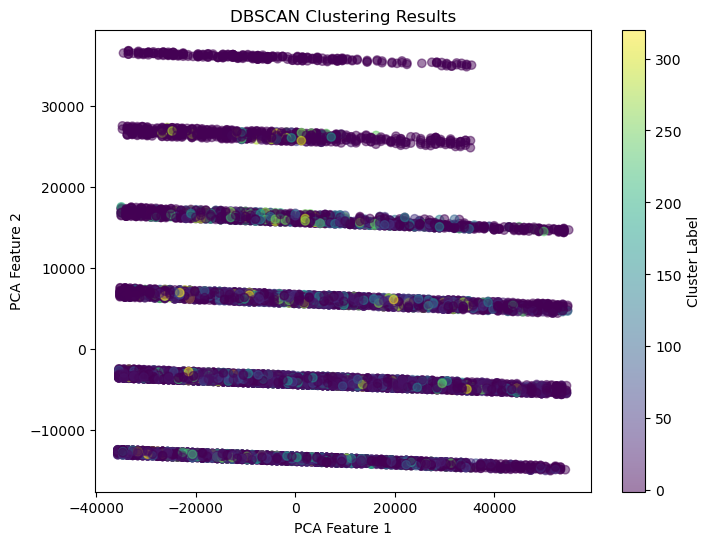

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('customerprofiles.csv')

# Convert directly convertible columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(df[col], errors='raise')
        except ValueError:
            continue

# Drop the 'id' column
df.drop('id', axis=1, inplace=True)

# Use Label Encoding for remaining categorical columns
for column in df.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])

# Impute missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_imputed)

# Initialize DBSCAN and fit it to the prepared DataFrame
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
df_imputed['clusters'] = clusters

# Use PCA to reduce the data dimensions to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_imputed.drop('clusters', axis=1))

# Plot the reduced data points, color-coded by cluster label
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_imputed['clusters'], cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()


In [17]:
# Exclude noise points
clusters_without_noise = df_imputed[df_imputed['clusters'] != -1]

# Count the number of points in each cluster
cluster_counts = clusters_without_noise['clusters'].value_counts()

# Identify the three largest clusters
three_largest_clusters = cluster_counts.nlargest(3)

# Print the three largest clusters and their sizes
print("The three largest clusters and their sizes are:")
print(three_largest_clusters)


The three largest clusters and their sizes are:
13    469
12    449
14    422
Name: clusters, dtype: int64


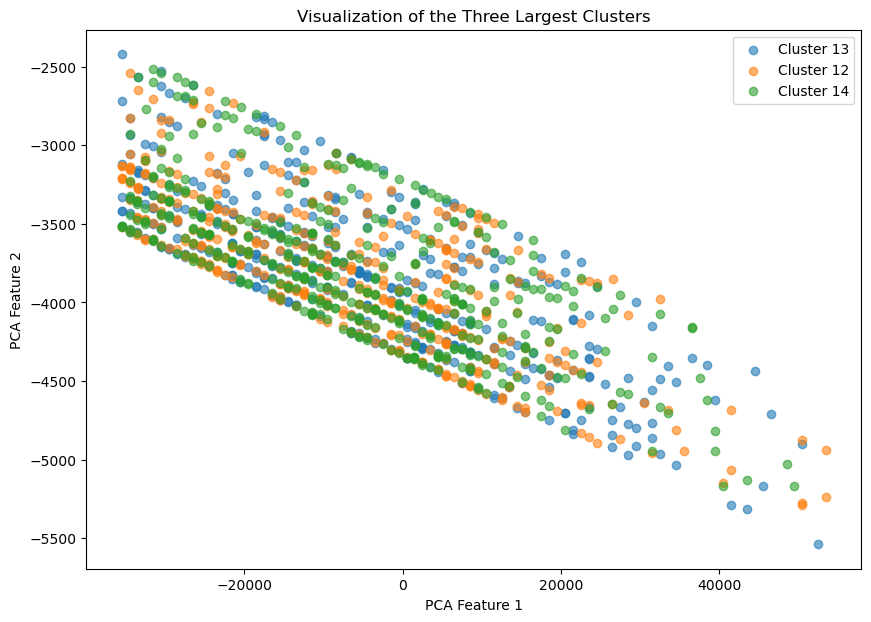

In [18]:
# Extract the labels of the three largest clusters
three_largest_cluster_labels = three_largest_clusters.index.tolist()

# Filter the reduced data to include only points belonging to the three largest clusters
filtered_indices = df_imputed['clusters'].isin(three_largest_cluster_labels)
filtered_data = reduced_data[filtered_indices]
filtered_labels = df_imputed['clusters'][filtered_indices]

# Plotting the three largest clusters
plt.figure(figsize=(10, 7))
for cluster_label in three_largest_cluster_labels:
    # Select data points belonging to the current cluster
    cluster_data = filtered_data[filtered_labels == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}', alpha=0.6)

# Annotate plot
plt.title('Visualization of the Three Largest Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


In [19]:
# Assuming 'df_imputed' is the DataFrame after imputation and scaling, and it includes the 'clusters' column

# Step 1: Filter DataFrames for each of the three largest clusters
cluster_dfs = {}
for cluster_label in three_largest_cluster_labels:
    cluster_dfs[cluster_label] = df_imputed[df_imputed['clusters'] == cluster_label]

# Step 2: Calculate summary statistics for each cluster
cluster_summaries = {}
for cluster_label, cluster_df in cluster_dfs.items():
    # You might want to exclude the 'clusters' column when calculating summaries
    cluster_summaries[cluster_label] = cluster_df.describe()

# Optionally, calculate summary statistics for the overall dataset (excluding noise)
overall_summary = df_imputed[df_imputed['clusters'] != -1].describe()

# Step 3: Print summary statistics to see the features
for cluster_label, summary in cluster_summaries.items():
    print(f"Summary for Cluster {cluster_label}:")
    print(summary, "\n")

# Optionally, print summary for the overall dataset
print("Summary for the overall dataset:")
print(overall_summary)


Summary for Cluster 13:
       gender         age  became_member_on (year month day)         income  \
count   469.0  469.000000                       4.690000e+02     469.000000   
mean      1.0   51.840085                       2.017083e+07   60498.933902   
std       0.0   17.760094                       3.194039e+02   18677.037496   
min       1.0   18.000000                       2.017010e+07   30000.000000   
25%       1.0   39.000000                       2.017062e+07   47000.000000   
50%       1.0   52.000000                       2.017091e+07   59000.000000   
75%       1.0   66.000000                       2.017111e+07   73000.000000   
max       1.0   94.000000                       2.017123e+07  118000.000000   

       ever_married   kids  home_state  clusters  
count         469.0  469.0  469.000000     469.0  
mean            1.0    0.0   20.034115      13.0  
std             0.0    0.0   13.793459       0.0  
min             1.0    0.0    0.000000      13.0  
25%      

In [20]:
# Assuming 'df_imputed' contains a 'clusters' column with DBSCAN results
# And 'income' column exists that represents income levels

# Step 1: Calculate mean income for each cluster
cluster_income_means = df_imputed[df_imputed['clusters'] != -1].groupby('clusters')['income'].mean()

# Step 2: Identify the cluster with the lowest mean income
low_income_cluster_label = cluster_income_means.idxmin()
low_income_cluster_mean = cluster_income_means.min()

print(f"The cluster with the lowest mean income is Cluster {low_income_cluster_label} with a mean income of {low_income_cluster_mean:.2f}.")

# Optional: Examine the characteristics of the low income cluster
low_income_cluster_data = df_imputed[df_imputed['clusters'] == low_income_cluster_label]
print(f"Descriptive statistics for the low income cluster (Cluster {low_income_cluster_label}):")
print(low_income_cluster_data.describe())


The cluster with the lowest mean income is Cluster 223 with a mean income of 32600.00.
Descriptive statistics for the low income cluster (Cluster 223):
       gender        age  became_member_on (year month day)        income  \
count     5.0   5.000000                       5.000000e+00      5.000000   
mean      0.0  72.400000                       2.017084e+07  32600.000000   
std       0.0   4.335897                       1.905080e+02   1816.590212   
min       0.0  68.000000                       2.017052e+07  31000.000000   
25%       0.0  68.000000                       2.017083e+07  31000.000000   
50%       0.0  74.000000                       2.017090e+07  32000.000000   
75%       0.0  74.000000                       2.017092e+07  34000.000000   
max       0.0  78.000000                       2.017101e+07  35000.000000   

       ever_married  kids  home_state  clusters  
count           5.0   5.0         5.0       5.0  
mean            1.0   1.0         8.0     223.0  
std 

In [21]:
# Count the number of data points in the low income cluster
low_income_cluster_count = low_income_cluster_data.shape[0]

print(f"Number of people in the low income cluster (Cluster {low_income_cluster_label}): {low_income_cluster_count}")


Number of people in the low income cluster (Cluster 223): 5


In [22]:
# Assuming 'income' is a column in your DataFrame 'df_imputed' and you've added 'clusters' labels from DBSCAN

# Step 1: Group by cluster label and calculate mean income and count of people per cluster
cluster_stats = df_imputed.groupby('clusters').agg(
    average_income=('income', 'mean'),  # Calculate the average income
    people_count=('income', 'count')  # Count the number of people in the cluster
)

# Step 2: Filter out clusters with fewer than 100 people
clusters_over_100 = cluster_stats[cluster_stats['people_count'] > 100]

# Step 3: Identify the cluster with the lowest average income among the filtered clusters
lowest_income_cluster = clusters_over_100['average_income'].idxmin()

# Print the result
print(f"The cluster with the lowest income among those with more than 100 people is: Cluster {lowest_income_cluster}")
print(f"Details:\n{clusters_over_100.loc[lowest_income_cluster]}")


The cluster with the lowest income among those with more than 100 people is: Cluster 11
Details:
average_income    54628.571429
people_count        105.000000
Name: 11, dtype: float64


In [23]:
# Ensure 'lowest_income_cluster' contains the cluster label from previous steps
# Extract all data points belonging to the lowest income cluster
lowest_income_cluster_data = df_imputed[df_imputed['clusters'] == lowest_income_cluster]

# Calculate summary statistics for this cluster
summary_statistics = lowest_income_cluster_data.describe()

# Print the summary statistics
print(f"Summary statistics for Cluster {lowest_income_cluster}:")
print(summary_statistics)


Summary statistics for Cluster 11:
       gender         age  became_member_on (year month day)        income  \
count   105.0  105.000000                       1.050000e+02    105.000000   
mean      1.0   49.666667                       2.018043e+07  54628.571429   
std       0.0   11.621984                       2.127310e+02  13527.932032   
min       1.0   21.000000                       2.018010e+07  32000.000000   
25%       1.0   42.000000                       2.018022e+07  45000.000000   
50%       1.0   51.000000                       2.018042e+07  52000.000000   
75%       1.0   58.000000                       2.018061e+07  63000.000000   
max       1.0   67.000000                       2.018072e+07  91000.000000   

       ever_married   kids  home_state  clusters  
count         105.0  105.0  105.000000     105.0  
mean            0.0    2.0   36.219048      11.0  
std             0.0    0.0    8.120464       0.0  
min             0.0    2.0   16.000000      11.0  
25%    

In [6]:
predictions

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [7]:
df["Clusters"] = predictions

<Axes: xlabel='age', ylabel='income'>

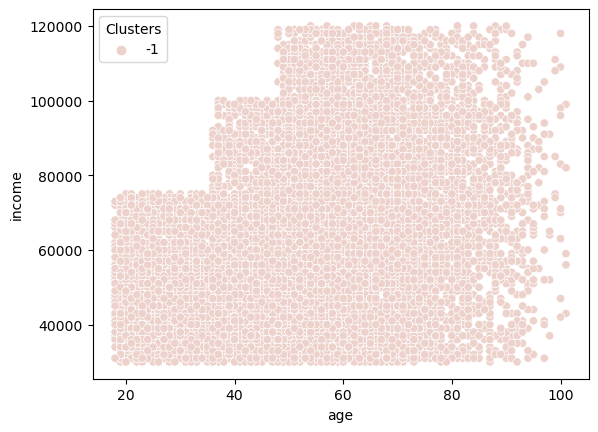

In [12]:
import seaborn as sns
sns.scatterplot(data=df, x="age", y="income", hue = "Clusters")

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
sScore = silhouette_score(df, predictions)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [25]:
sScore

NameError: name 'sScore' is not defined

In [63]:
def tuneParameters():
    models = {}
    for eps in range(1, 100):
        for samp in range(2, 20):
            dbscan = DBSCAN(eps=eps, min_samples=samp)
            dbscan.fit(df)
            predictions = dbscan.fit_predict(df)
            if len(set(predictions)) >= 3:
                sScore = silhouette_score(df, predictions)
                models[sScore] = [eps, samp]
    return models

In [64]:
scores = tuneParameters()

In [66]:
scores

{-0.4750261018077376: [3, 2],
 -0.5129803805751197: [4, 2],
 -0.46332473390800144: [5, 2],
 -0.31856218527186114: [5, 3],
 -0.2903488730555967: [6, 2],
 -0.44354214057007213: [6, 3],
 -0.3006169757847084: [6, 4],
 -0.17154201659875298: [7, 2],
 -0.3618564801217498: [7, 3],
 -0.3690724481247459: [7, 4],
 -0.09820011130907201: [8, 2],
 -0.2955904146783946: [8, 3],
 -0.33947506968887675: [8, 4],
 0.035986275223781214: [9, 2],
 -0.15311901741700493: [9, 3],
 -0.31799058434531036: [9, 4],
 -0.30413391128997397: [9, 5],
 0.09193371878515716: [10, 2],
 -0.024649715316340737: [10, 3],
 -0.06629112307990902: [10, 4],
 -0.2022924217015842: [10, 5],
 -0.28909858298513036: [10, 6],
 0.07650491465308297: [11, 2],
 -0.02882441838679009: [11, 3],
 -0.05593631396754103: [11, 4],
 -0.15957805790885207: [11, 5],
 -0.2808210665741959: [11, 6],
 0.06568243784704622: [12, 2],
 0.035130244918149416: [12, 3],
 -0.09427910172841104: [12, 4],
 -0.09874092586088432: [12, 5],
 -0.21720913495788913: [12, 6],
 -0.

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

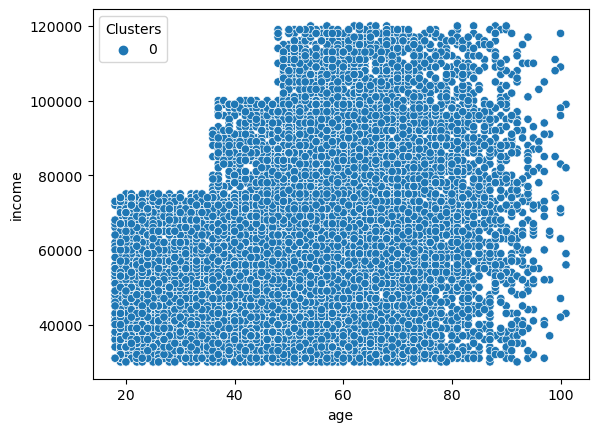

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("customer_profiles.csv")

# Encode gender: Female -> 0, Male -> 1
encodedGender = df['gender'].map({'F': 0, 'M': 1}).tolist()

df["Encoded Gender"] = encodedGender
df.drop(["gender"], axis=1, inplace=True)

# Select and scale relevant features for clustering
features_for_clustering = df[['age', 'income']].dropna()  # Assuming 'age' and 'income' are the features you want to cluster on
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Apply DBSCAN
dbscan = DBSCAN(eps=19, min_samples=4)
predictions = dbscan.fit_predict(scaled_features)

# Add cluster labels to the dataframe
features_for_clustering["Clusters"] = predictions

# Visualization
sns.scatterplot(data=features_for_clustering, x="age", y="income", hue="Clusters")

# Compute silhouette score
sScore = silhouette_score(scaled_features, predictions)

print(sScore)

# Parameter tuning function, adjusted for the scaled features
def tuneParameters(scaled_data):
    models = {}
    for eps in range(1, 100):
        for samp in range(2, 20):
            dbscan = DBSCAN(eps=eps, min_samples=samp)
            predictions = dbscan.fit_predict(scaled_data)
            if len(set(predictions)) - (1 if -1 in predictions else 0) >= 3:  # Ensure we have at least 3 clusters excluding noise
                sScore = silhouette_score(scaled_data, predictions)
                models[sScore] = [eps, samp]
    return models

scores = tuneParameters(scaled_features)

print(scores)
